In [11]:
import pandas as pd
from feature_selector import *

In [14]:
df = pd.read_csv("../dataset/features/data.csv")


In [15]:
df.head()

,Unnamed: 0,ID,Label,1,2,3,4,5,6,7,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train_labels = df['Label']
# delete first unnamed column and ID, Label columns
train = df.iloc[:,3:]

In [33]:
train

,Label,1,2,3,4,5,6,7,8,9,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fs = FeatureSelector(data = train, labels = train_labels)

#### Alternative Option for Using all Methods

In [7]:
# fs.identify_all(selection_params = {'missing_threshold': 0.6,'correlation_threshold': 0.98, 'task': 'classification', 'eval_metric': 'auc', 
#                                      'cumulative_importance': 0.99})

#### 1. Missing values

In [8]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [9]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

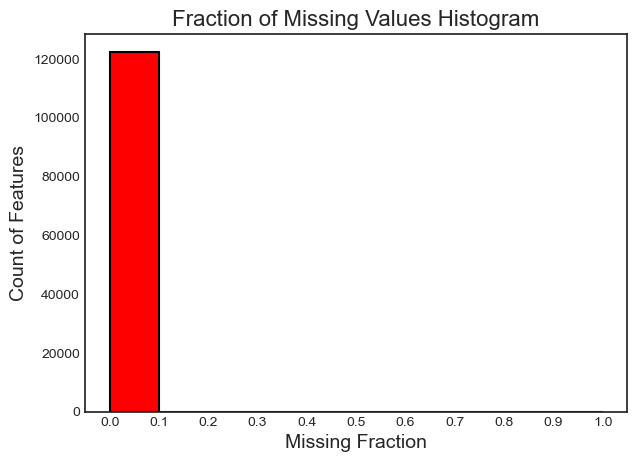

In [10]:
fs.plot_missing()

#### 2. Single Unique Value

In [11]:
fs.identify_single_unique()

0 features with a single unique value.



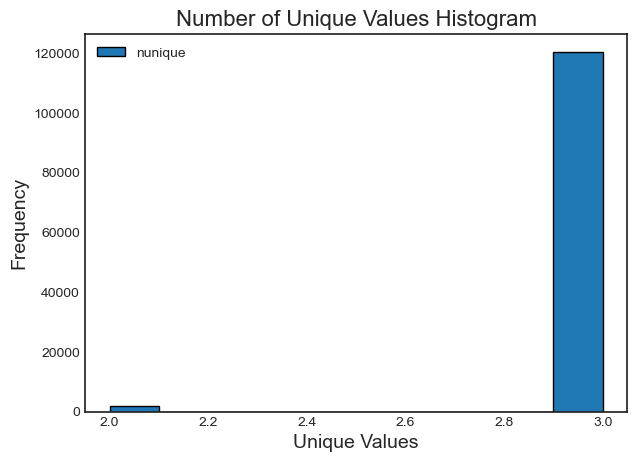

In [12]:
single_unique = fs.ops['single_unique']
fs.plot_unique()

In [13]:
fs.unique_stats.sample(5)

,nunique
75792,3
67529,3
26387,3
4299,3
26171,3


#### 3. Collinear (highly correlated) Features


In [14]:
# fs.identify_collinear(correlation_threshold=0.975)

In [15]:
# correlated_features = fs.ops['collinear']
# correlated_features[:5]

In [16]:
# fd.plot_collinear()

In [17]:
# fs.identify_collinear(correlation_threshold=0.98)
# fs.plot_collinear()

#### 4. Zero Importance Features

In [18]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.63496
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.635179
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.985893	valid_0's binary_logloss: 0.636574
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.63496
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.992947	valid_0's binary_logloss: 0.433757
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.635288
Training until validation scores don

In [19]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 122267 original features
There are 4 one-hot features


In [20]:
fs.data_all.head(10)

,1_2,1_label,2_3,2_Un known,0,1,2,3,4,5,...,122257,122258,122259,122260,122261,122262,122263,122264,122265,122266
0,1,0,1,0,1,2,3,4,5,6,...,122328,122329,122330,122331,122332,122333,122334,122335,122336,122337
1,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,1,0,1,0,label,Un known,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,1,0,1,0,label,Un known,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,1,0,1,0,label,Un known,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,0,1,0,1,0,label,Un known,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [21]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[81524, 81551, 81523, 81522, 81521]

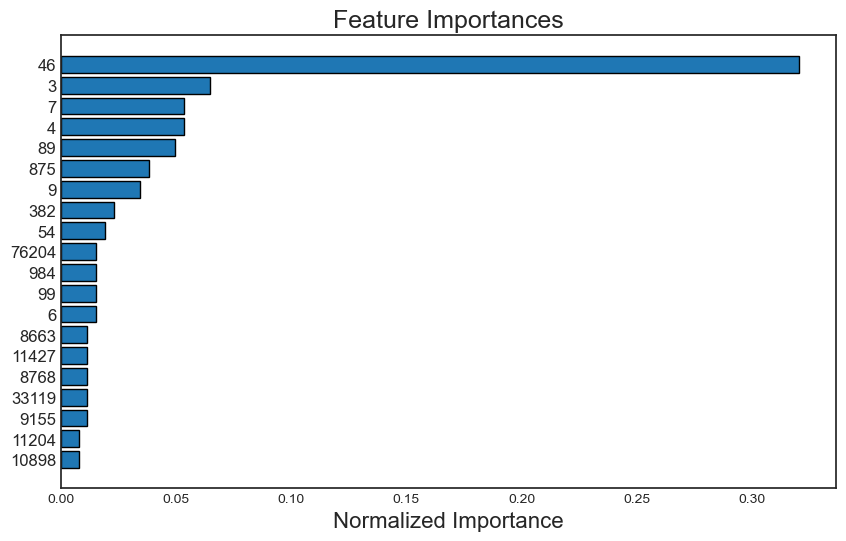

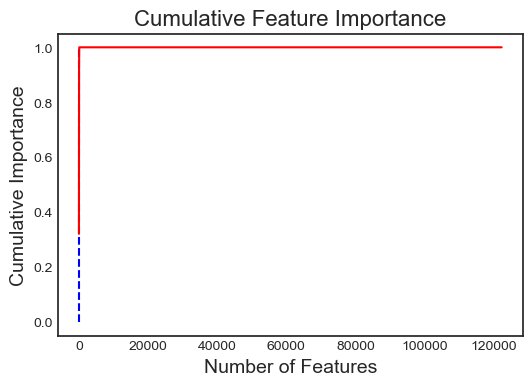

60 features required for 0.99 of cumulative importance


In [22]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [23]:
fs.feature_importances.head(30)

,feature,importance,normalized_importance,cumulative_importance
0,46,8.4,0.320611,0.320611
1,3,1.7,0.064885,0.385496
2,7,1.4,0.053435,0.438931
3,4,1.4,0.053435,0.492366
4,89,1.3,0.049618,0.541985
5,875,1.0,0.038168,0.580153
6,9,0.9,0.034351,0.614504
7,382,0.6,0.022901,0.637405
8,54,0.5,0.019084,0.656489
9,76204,0.4,0.015267,0.671756


#### 5. Low Importance Features

In [24]:
fs.identify_low_importance(cumulative_importance = 0.99)

59 features required for cumulative importance of 0.99 after one hot encoding.
122210 features do not contribute to cumulative importance of 0.99.



In [25]:
fs.identify_low_importance(cumulative_importance = 0.98)

56 features required for cumulative importance of 0.98 after one hot encoding.
122213 features do not contribute to cumulative importance of 0.98.



In [26]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

[115084, 9093, 10894, 28, 8678]

# Removing Features

In [27]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [28]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 122207 features.


In [29]:
all_to_remove = fs.check_removal()

Total of 122213 features identified for removal


In [30]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 122213 features.


In [47]:
train_removed

,1,2,3,4,6,7,9,10,46,54,...,19949,20463,22150,24177,33119,36997,42938,51425,56694,76204
0,2,3,4,5,7,8,10,11,47,55,...,19953,20467,22155,24183,33127,37009,42952,51443,56713,76235
1,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
331,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
332,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
333,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
# remove the index columns
train_removed = train_removed.drop([0,192])
train_removed

,1,2,3,4,6,7,9,10,46,54,...,19949,20463,22150,24177,33119,36997,42938,51425,56694,76204
1,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,label,Un known,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
331,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
332,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
333,label,Un known,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [49]:
train_removed.to_pickle('../../dataset/Feature_Selector/selected_features.pkl')

find the removed features